In [1]:
import numpy as np
import torch
import torch.nn as nn
import seaborn as sns
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, mean_squared_error

In [2]:
from neupy.algorithms import PNN, GRNN
from sklearn.svm import SVC

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
x = np.arange(0, 1.5+0.004, 0.004)

In [4]:
first_x1 = np.sqrt(2*0.3*x)
first_x2 = -np.sqrt(2*0.3*x)
y1 = np.concatenate((first_x1, first_x2))
x1 = np.concatenate((x,x))

In [5]:
second_x1 = np.sqrt(2*0.5*x)
second_x2 = -np.sqrt(2*0.5*x)
y2 = np.concatenate((second_x1, second_x2))
x2 = np.concatenate((x,x)) - 0.4

In [6]:
third_x1 = np.sqrt(2*x)
third_x2 = -np.sqrt(2*x)
y3 = np.concatenate((third_x1, third_x2))
x3 = np.concatenate((x,x)) - 0.8

<AxesSubplot:>

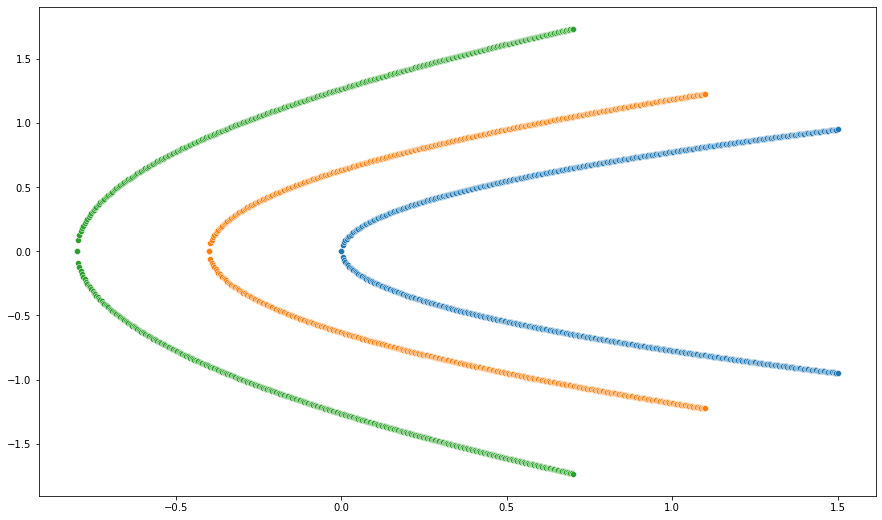

In [7]:
plt.figure(figsize=(15,9))
sns.scatterplot(x=x1, y=y1)
sns.scatterplot(x=x2, y=y2)
sns.scatterplot(x=x3, y=y3)

<AxesSubplot:>

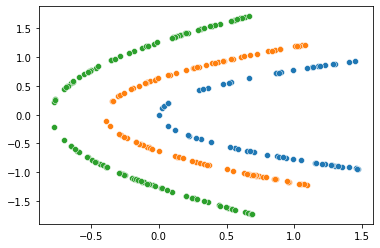

In [8]:
a = np.array(list(zip(x1, y1)))
ind = np.arange(0, len(a))
rind = np.random.choice(ind, 60)
x1_ = a[rind][:,0]
y1_ = a[rind][:,1]
sns.scatterplot(x=x1_, y=y1_)


a = np.array(list(zip(x2, y2)))
ind = np.arange(0, len(a))
rind = np.random.choice(ind, 100)
x2_ = a[rind][:,0]
y2_ = a[rind][:,1]
sns.scatterplot(x=x2_, y=y2_)


a = np.array(list(zip(x3, y3)))
ind = np.arange(0, len(a))
rind = np.random.choice(ind, 120)
x3_ = a[rind][:,0]
y3_ = a[rind][:,1]
sns.scatterplot(x=x3_, y=y3_)

In [9]:
q1 = np.array(list(zip(x1_, y1_)))
q2 = np.array(list(zip(x2_, y2_)))
q3 = np.array(list(zip(x3_, y3_)))

In [10]:
X = np.concatenate((q1, q2, q3))
Y = np.array([0]*60 + [1]*100 + [2]*120).reshape(-1,1)

In [11]:
X.shape

(280, 2)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42, test_size=0.2)

<AxesSubplot:>

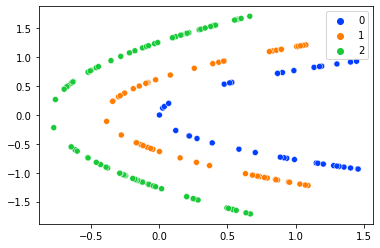

In [13]:
sns.scatterplot(x=X_train[:,0], y=X_train[:,1], hue=y_train.ravel(), palette='bright')

<AxesSubplot:>

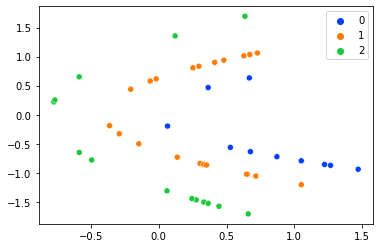

In [14]:
sns.scatterplot(x=X_val[:,0], y=X_val[:,1], hue=y_val.ravel(), palette='bright')

<AxesSubplot:>

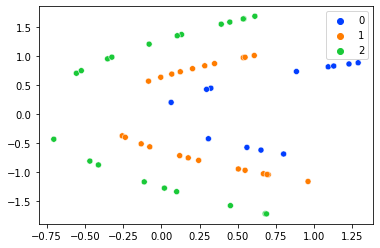

In [15]:
sns.scatterplot(x=X_test[:,0], y=X_test[:,1], hue=y_test.ravel(), palette='bright')

In [16]:
y_train.ravel()

array([2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 0, 2, 2,
       1, 2, 0, 0, 1, 2, 1, 0, 2, 0, 0, 2, 2, 0, 2, 2, 1, 1, 2, 2, 1, 2,
       2, 0, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 0,
       2, 2, 2, 0, 0, 0, 2, 1, 2, 2, 0, 1, 1, 0, 1, 2, 1, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 0, 0, 2, 1, 1, 1, 1, 2, 1, 0, 2, 0,
       1, 1, 1, 2, 1, 0, 1, 2, 2, 1, 2, 0, 0, 2, 0, 2, 1, 2, 1, 1, 0, 1,
       2, 2, 2, 2, 2, 1, 2, 2, 0, 1, 2, 2, 1, 2, 0, 2, 1, 0, 1, 2, 0, 0,
       1, 0, 1, 1, 1, 0, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2,
       0, 1, 0])

In [17]:
from matplotlib.colors import ListedColormap

def plot_mesh(X, y, model):
    plt.figure(figsize=(15,9))
    colors = ['violet', 'lightgreen', 'crimson']
    cmap = ListedColormap(sns.color_palette(colors))
    
    x1_min, x1_max = X[:, 0].min()-1.5, X[:, 0].max()+1.5
    x2_min, x2_max = X[:, 1].min()-1.5, X[:, 1].max()+1.5
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.005),
                           np.arange(x1_min, x1_max, 0.005))
    
    in_model = torch.tensor(np.array([xx1.ravel(), xx2.ravel()]).T).float()
    output = model.predict(in_model)
    plt.contourf(xx1, xx2, output.reshape(xx2.shape), cmap=cmap)
    
    plt.scatter(X[y==0,0],X[y==0,1], s=80, cmap=cmap, c=colors[0], edgecolors='black')
    plt.scatter(X[y==1,0],X[y==1,1], s=80, cmap=cmap, c=colors[1], edgecolors='black')
    plt.scatter(X[y==2,0],X[y==2,1], s=80, cmap=cmap, c=colors[2], edgecolors='black')

## Часть 1. Использовать вероятностную нейронную сеть для классификации точек в случае, когда классы не являются линейно разделимыми

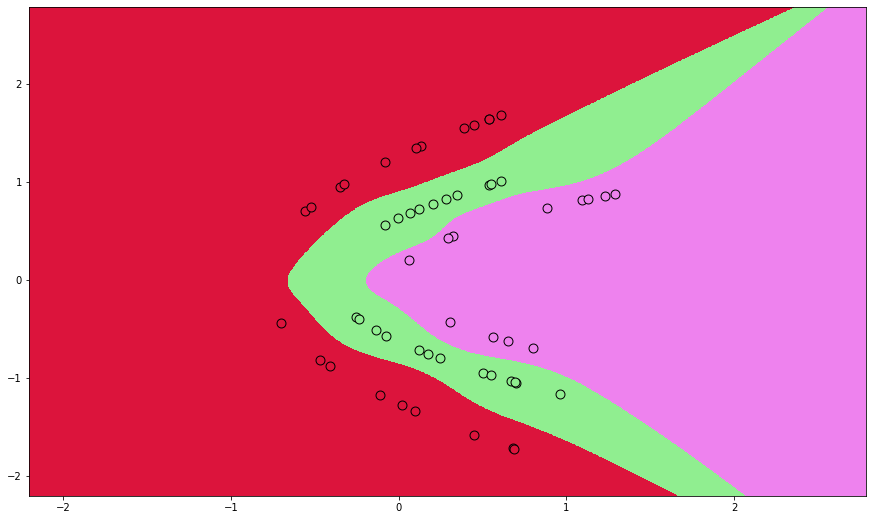

In [18]:
net = PNN(std=0.3)
net.fit(X_train, y_train)
plot_mesh(X_test, y_test.ravel(), net)

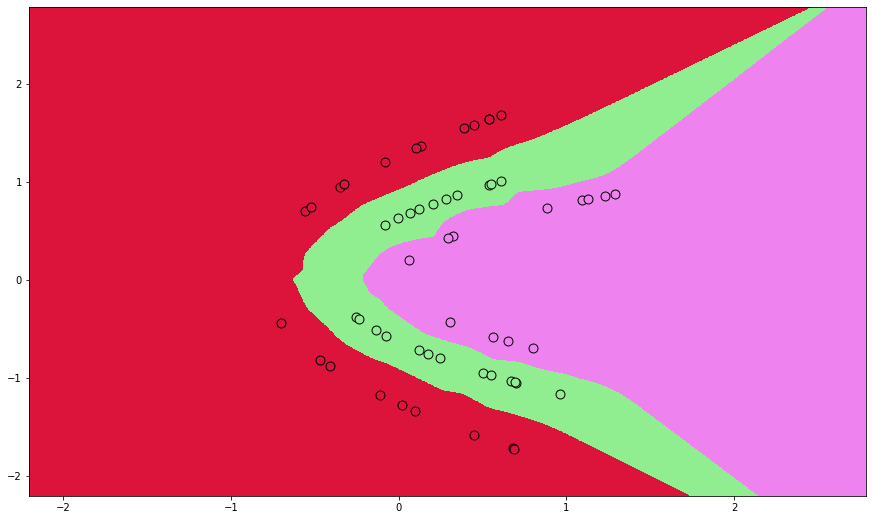

In [19]:
net = PNN(std=0.1)
net.fit(X_train, y_train)
plot_mesh(X_test, y_test.ravel(), net)

## Часть 2. Использовать сеть с радиальными базисными элементами (RBF) для классификации точек в случае, когда классы не являются линейно разделимыми

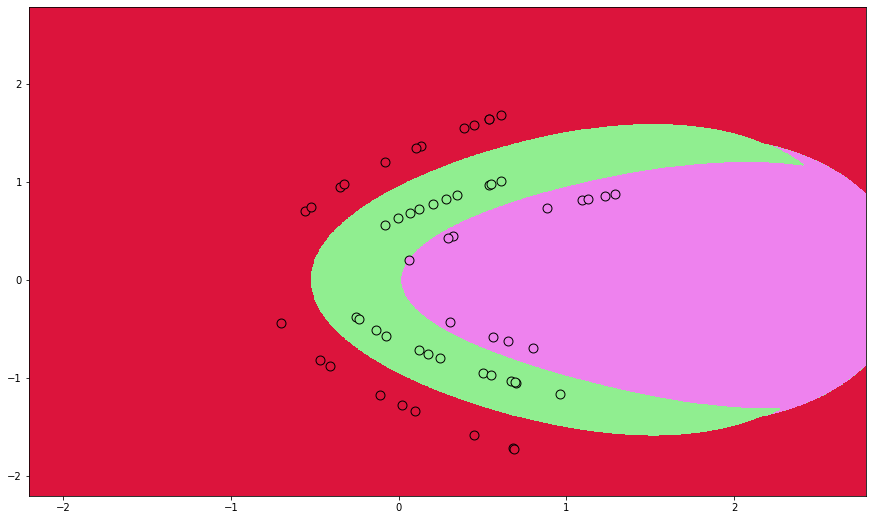

In [20]:
svc = SVC(gamma=0.3, kernel='rbf')
svc.fit(X_train, y_train.ravel())
plot_mesh(X_test, y_test.ravel(), svc)

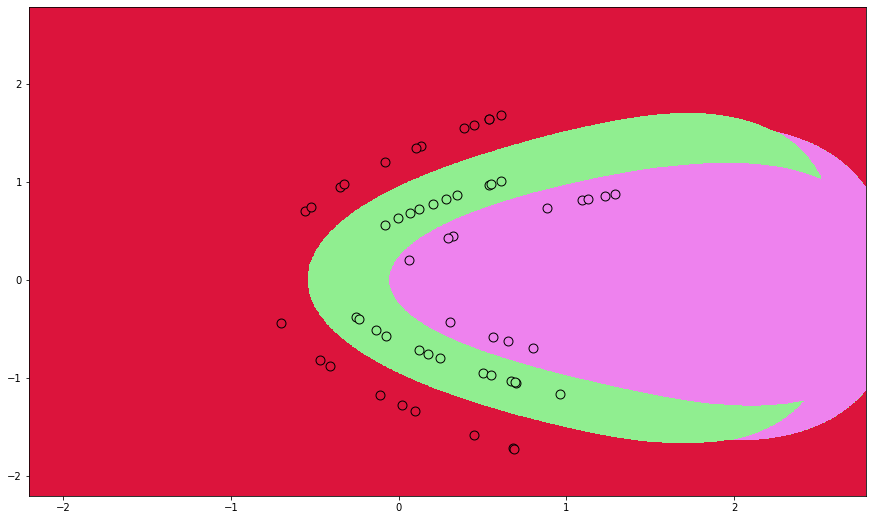

In [21]:
svc = SVC(gamma='auto', kernel='rbf')
svc.fit(X_train, y_train.ravel())
plot_mesh(X_test, y_test.ravel(), svc)

## Часть 3. Использовать обобщенно-регрессионную нейронную сеть для аппроксимации функции. Проверить работу сети с рыхлыми данными

In [22]:
def fx(t):
    return np.sin(t*t-5*t+6)

<AxesSubplot:>

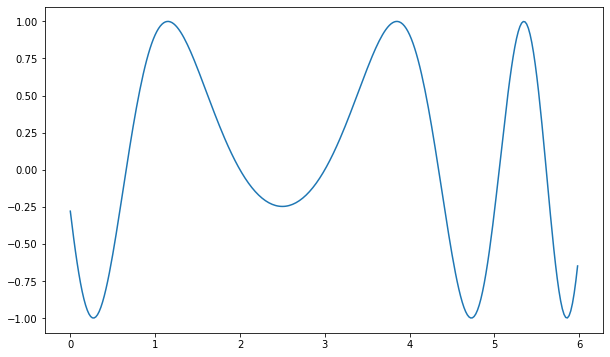

In [23]:
t = np.arange(0, 6, 0.02)
FX = fx(t)
plt.figure(figsize=(10,6))
sns.lineplot(x=t, y=FX)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(t, FX, test_size=0.5, random_state=42)

<AxesSubplot:>

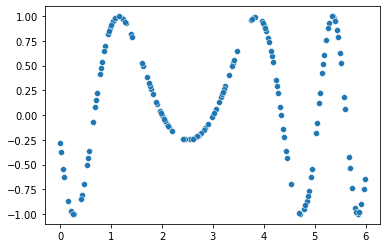

In [25]:
sns.scatterplot(x=X_train, y=y_train)

In [26]:
net = GRNN(std=0.3)
net.fit(X_train, y_train)

GRNN(verbose=False, step=None, show_epoch=None, shuffle_data=None, epoch_end_signal=None, train_end_signal=None, std=0.3)

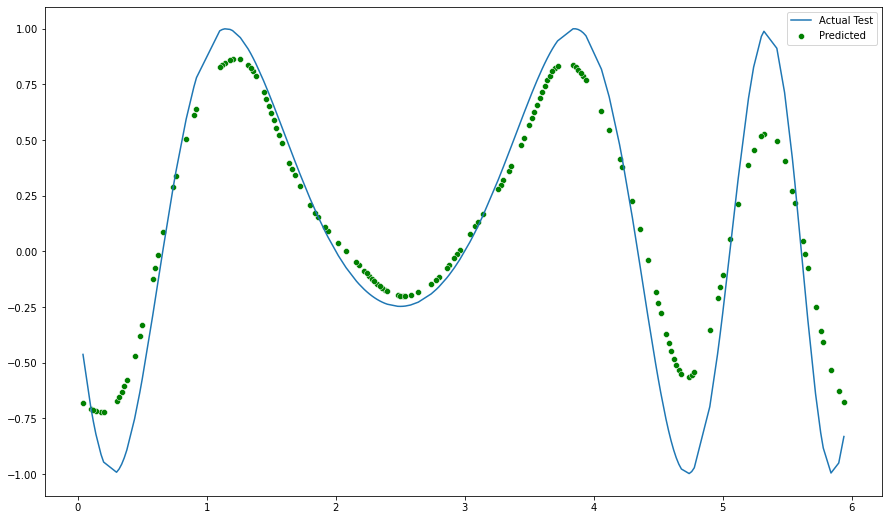

In [27]:
plt.figure(figsize=(15,9))
sns.lineplot(x=X_test, y=y_test, label='Actual Test')
sns.scatterplot(x=X_test, y=net.predict(X_test).ravel(), color='g', label='Predicted')
plt.legend()

In [28]:
X_train = np.concatenate([np.arange(0, 1, 0.02), np.arange(2, 3, 0.02), np.arange(4, 5, 0.02)])
y_train = fx(X_train)
X_test = np.concatenate([np.arange(1, 2, 0.02), np.arange(3, 4, 0.02)])
y_test = fx(X_test)

In [29]:
net = GRNN(std=0.5)
net.fit(X_train, y_train)

GRNN(verbose=False, step=None, show_epoch=None, shuffle_data=None, epoch_end_signal=None, train_end_signal=None, std=0.5)

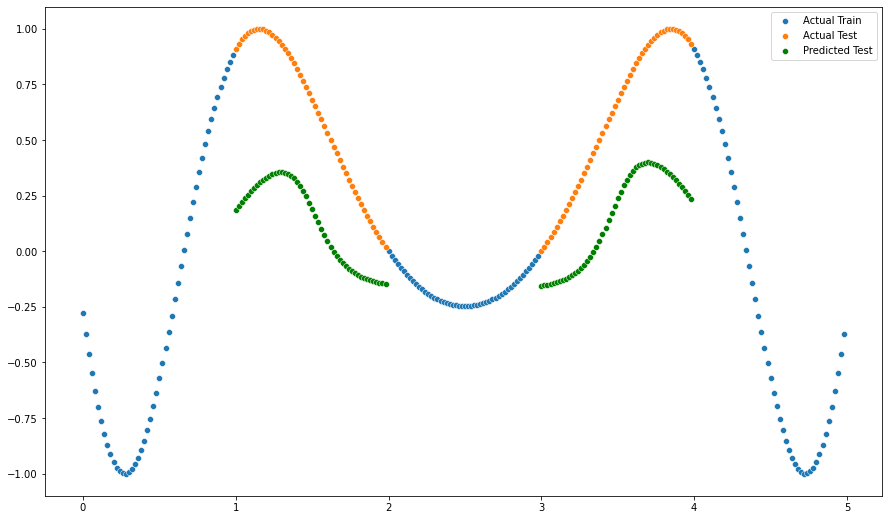

In [30]:
plt.figure(figsize=(15,9))
sns.scatterplot(x=X_train, y=y_train, label='Actual Train')
sns.scatterplot(x=X_test, y=y_test, label='Actual Test')
sns.scatterplot(x=X_test, y=net.predict(X_test).ravel(), color='g', label='Predicted Test')
plt.legend()